In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import KFold
from sklearn.metrics import log_loss

plt.style.use(['ggplot'])

In [8]:
gatrain = pd.read_csv(os.getcwd() + '/data/raw/gender_age_train.csv')
gatest  = pd.read_csv(os.getcwd() + '/data/raw/gender_age_test.csv')
gatrain.head(3)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>device_id</th>
      <th>gender</th>
      <th>age</th>
      <th>group</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>-8076087639492063270</td>
      <td>M</td>
      <td>35</td>
      <td>M32-38</td>
    </tr>
    <tr>
      <th>1</th>
      <td>-2897161552818060146</td>
      <td>M</td>
      <td>35</td>
      <td>M32-38</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-8260683887967679142</td>
      <td>M</td>
      <td>35</td>
      <td>M32-38</td>
    </tr>
  </tbody>
</table>
</div>

In [9]:
gatrain.shape[0] - gatrain.device_id.nunique()

0

In [10]:
gatest.shape[0] - gatest.device_id.nunique()

0

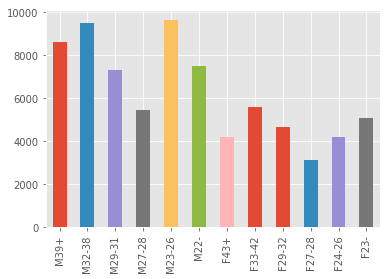

In [11]:
gatrain.group.value_counts().sort_index(ascending=False).plot(kind='bar')

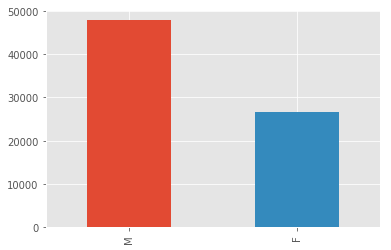

In [12]:
gatrain.gender.value_counts().plot(kind='bar')

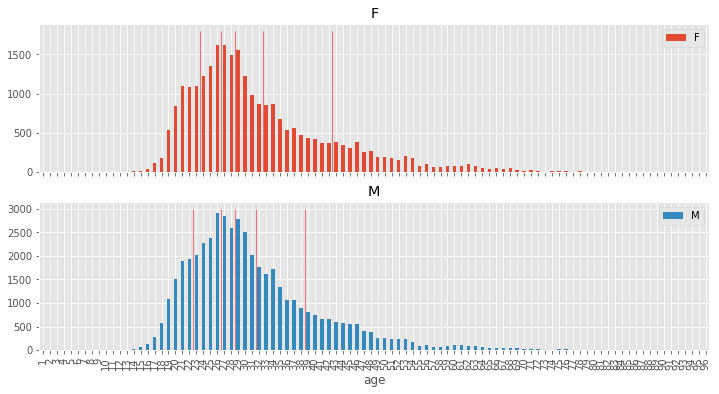

In [14]:
c = gatrain.groupby(['age', 'gender']).size().unstack().reindex(index=np.arange(gatrain.age.min(), gatrain.age.max() + 1)).fillna(0)

ax1, ax2 = c.plot(kind='bar', figsize=(12, 6), subplots=True)
ax1.vlines(np.array([23, 26, 28, 32, 42]) - 0.5, 0, 1800, alpha=0.5, linewidth=1, color='r')
ax2.vlines(np.array([22, 26, 28, 31, 38]) - 0.5, 0, 3000, alpha=0.5, linewidth=1, color='r')


In [15]:
letarget = LabelEncoder().fit(gatrain.group.values)
y = letarget.transform(gatrain.group.values)
n_classes = len(letarget.classes_)

In [16]:
pred = np.ones((gatrain.shape[0],n_classes))/n_classes
log_loss(y, pred)

2.4849066497880012

In [17]:
kf = KFold(gatrain.shape[0], n_folds=10, shuffle=True, random_state=0)
pred = np.zeros((gatrain.shape[0],n_classes))
for itrain, itest in kf:
    train = gatrain.iloc[itrain,:]
    test = gatrain.iloc[itest,:]
    ytrain, ytest = y[itrain], y[itest]
    prob = train.groupby('group').size()/train.shape[0]
    pred[itest,:] = prob.values
print(log_loss(y, pred))

2.42805122275


In [11]:
phone = pd.read_csv("C:/Users/User/Desktop/New_folder/phone_brand_device.csv",encoding='utf-8')
phone.head(3)

device_id phone_brand device_model
0 -8890648629457979026          小米           红米
1  1277779817574759137          小米         MI 2
2  5137427614288105724          三星    Galaxy S4

In [12]:
sample = pd.read_csv("C:/Users/User/Desktop/New_folder/sample_submission.csv",encoding='utf-8')
sample.head(3)

device_id    F23-  F24-26  F27-28  F29-32  F33-42    F43+  \
0  1002079943728939269  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833   
1 -1547860181818787117  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833   
2  7374582448058474277  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833   

     M22-  M23-26  M27-28  M29-31  M32-38    M39+  
0  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  
1  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  
2  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833

In [13]:
print('{} rows'.format(phone.shape[0]))
print("unique values:")
for c in phone.columns:
    print('{}: {}'.format(c, phone[c].nunique())) 

187245 rows
unique values:
device_id: 186716
phone_brand: 131
device_model: 1599


In [14]:
print('{} rows'.format(sample.shape[0]))
print("unique values:")
for d in sample.columns:
    print('{}: {}'.format(d, sample[d].nunique()))   

112071 rows
unique values:
device_id: 112071
F23-: 1
F24-26: 1
F27-28: 1
F29-32: 1
F33-42: 1
F43+: 1
M22-: 1
M23-26: 1
M27-28: 1
M29-31: 1
M32-38: 1
M39+: 1


In [15]:
dup = phone.groupby('device_id').size()
dup = dup[dup>1]
dup.shape

(529,)

In [16]:
dup1 = sample.groupby('device_id').size()
dup1 = dup1[dup1>1]
dup1.shape

(0,)

In [17]:
dup.value_counts()

2    529
dtype: int64

In [18]:
dup1.value_counts()

Series([], dtype: int64)

In [19]:
dup = phone.loc[phone.device_id.isin(dup.index)]
first = dup.groupby('device_id').first()
last = dup.groupby('device_id').last()

In [20]:
dup1 = sample.loc[sample.device_id.isin(dup1.index)]
first1 = sample.groupby('device_id').first()
last1 = dup1.groupby('device_id').last()

In [21]:
diff = (first != last).sum(axis=1).nonzero()
pd.concat((first.iloc[diff], last.iloc[diff]),axis=1)

phone_brand         device_model phone_brand device_model
device_id                                                                     
-7297178577997113203          华为               荣耀畅玩5X          华为         荣耀3C
-7059081542575379359          LG              Nexus 5          魅族     魅蓝Note 2
-6590454305031525112          小米                 MI 3          华为     荣耀6 Plus
-5269721363279128080          三星  Galaxy Core Advance          小米         MI 3
-3004353610608679970          酷派                 5891          酷派         7296
 5245428108336915020          魅族                  MX4          小米  MI One Plus

In [22]:
dev = _.index
print("in train: {}".format(sum(gatrain.device_id.isin(dev))))
print("in test: {}".format(sum(gatest.device_id.isin(dev))))

in train: 1
in test: 5


In [23]:
phone = phone.drop_duplicates('device_id', keep='first')

In [24]:
c = phone.groupby('device_model')['phone_brand'].apply(pd.Series.nunique)
c.value_counts()

1    1545
2      43
3       8
4       3
Name: phone_brand, dtype: int64

In [25]:
lebrand = LabelEncoder().fit(phone.phone_brand)
phone['brand'] = lebrand.transform(phone.phone_brand)
m = phone.phone_brand.str.cat(phone.device_model)
lemodel = LabelEncoder().fit(m)
phone['model'] = lemodel.transform(m)

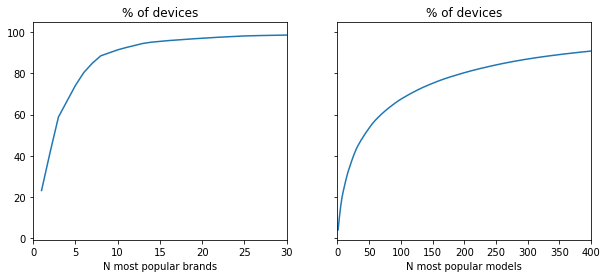

In [26]:
c = phone.brand.value_counts()
s = c.cumsum()/c.sum()
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,4))
ax1.plot(np.arange(s.shape[0])+1, s.values*100)
ax1.set_xlim(0,30)
ax1.set_xlabel('N most popular brands')
ax1.set_title('% of devices');
c = phone.model.value_counts()
s = c.cumsum()/c.sum()
ax2.plot(np.arange(s.shape[0])+1, s.values*100)
ax2.set_xlim(0,400)
ax2.set_xlabel('N most popular models')
ax2.set_title('% of devices');

In [27]:
train = gatrain.merge(phone[['device_id','brand','model']], how='left',on='device_id')

In [28]:
def plot_by(df, cat, by, perc = 0.95):
    # Find popular categories
    c = df[by].value_counts().cumsum()/df.shape[0]
    take = c[c<=perc].index
    # Pool rare categories into 'other' cat
    gr = df[by].copy()
    gr[~(df[by].isin(take))] = 'other'
    # Count target classes in groups
    c = df.groupby([gr,cat]).size().unstack().fillna(0)
    total = c.sum(axis=1)
    meanprobs = c.sum(axis=0).cumsum()/df.shape[0]
    # Transform to probabilities
    sortcol = c.columns[int(np.floor((c.shape[1]-1)/2))]
    c = c.div(c.sum(axis=1), axis='index')
    # Cumsum for stacked bars
    c = c.cumsum(axis=1).sort_values(by=sortcol)
    total = total.loc[c.index]
    # Prepare plot data
    left = np.array([0, *(total.iloc[:-1].cumsum().values)])
    ticks = left + 0.5*total.values
    colors = cm.rainbow(np.linspace(0.1,0.9,num=c.shape[1]))
    fig, ax = plt.subplots(figsize=(10,5))
    for (i,col) in enumerate(c.columns[::-1]):
        height = c[col].values
        ax.bar(left, height, total.values,label=col,color=colors[i],zorder = c.shape[0]+i)
    for p in meanprobs.iloc[:-1]:
        ax.hlines(p, 0, total.sum(),
                  color='w',alpha=0.6,zorder=c.shape[0]*10,linewidth=1)
    # legend placement needs more work
    ax.legend(bbox_to_anchor=(1.1, 0.8),title=cat)
    ax.set_xticks(ticks)
    ax.set_xticklabels(total.index, rotation='vertical')
    ax.set_xlabel(by)
    ax.set_xlim(0,left[-1]+total.values[-1])
    return ax

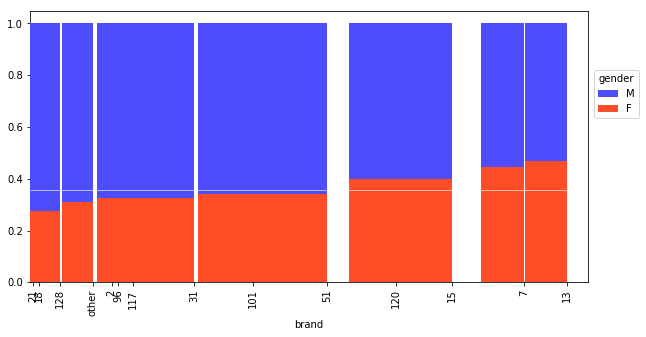

In [29]:
ax = plot_by(train, 'gender','brand')

In [30]:
lebrand.classes_[[15, 7, 13]]

array(['三星', 'OPPO', 'vivo'], dtype=object)

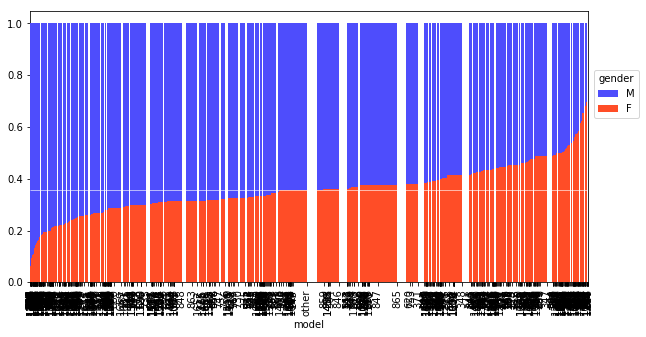

In [31]:
ax = plot_by(train, 'gender','model')

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been

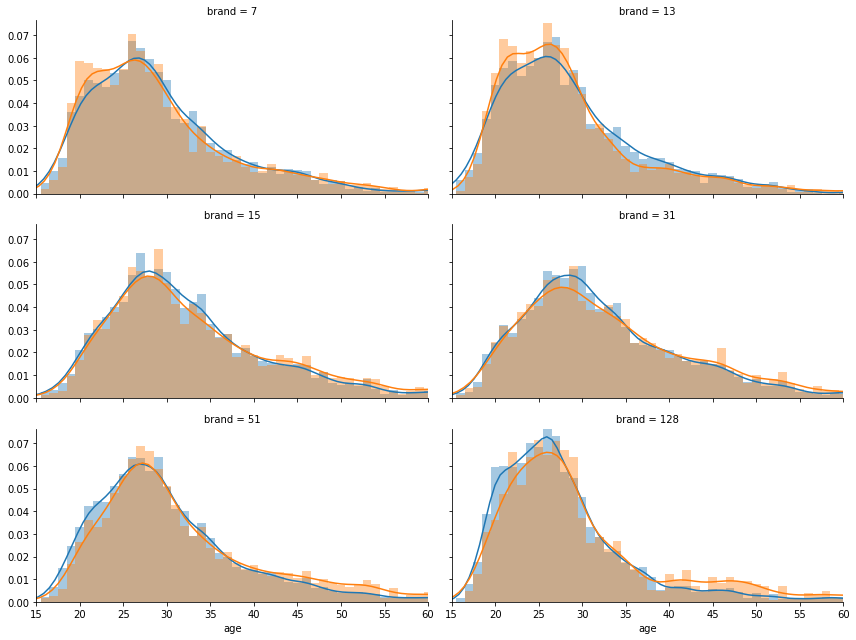

In [32]:
brands = train.brand.value_counts().index[:6]
c = train[train.brand.isin(brands)]
g = sns.FacetGrid(c, hue='gender', col='brand',col_wrap=2, aspect=2, xlim=(15,60))
g.map(sns.distplot, 'age', bins=np.arange(15,70)+0.5)

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been

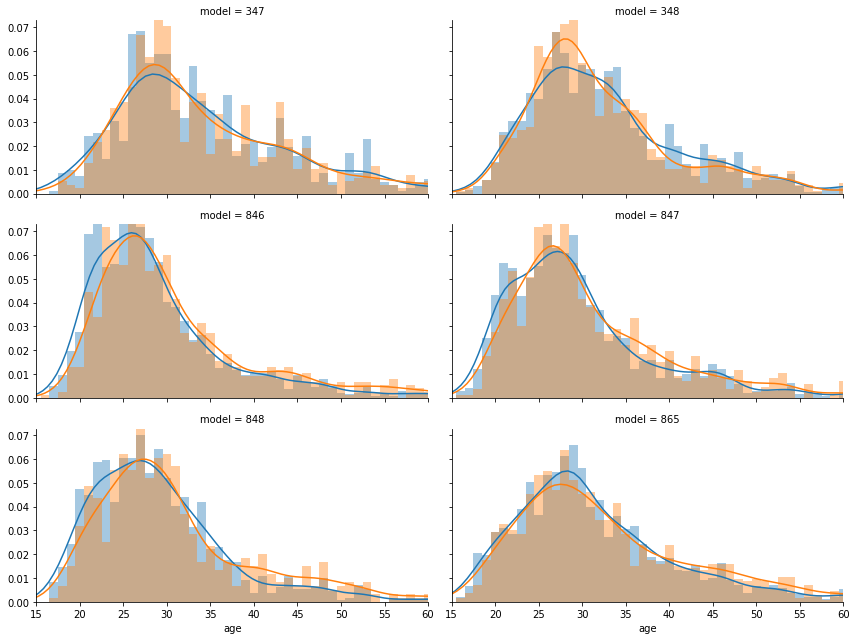

In [33]:
models = train.model.value_counts().index[:6]
c = train[train.model.isin(models)]
g = sns.FacetGrid(c, hue='gender', col='model',col_wrap=2, aspect=2, xlim=(15,60))
g.map(sns.distplot, 'age', bins=np.arange(15,70)+0.5)

In [34]:
ptrain = gatrain.merge(phone[['device_id','brand','model']], how='left',on='device_id')
ptrain.head(3)

device_id gender  age   group  brand  model
0 -8076087639492063270      M   35  M32-38     51    843
1 -2897161552818060146      M   35  M32-38     51    843
2 -8260683887967679142      M   35  M32-38     51    843

In [35]:
class GenderProb(object):
    def __init__(self, prior_weight=10.):
        self.prior_weight = prior_weight
    
    def fit(self, df, by):
        self.by = by
        self.label = 'pF_' + by
        self.prior = (df['gender']=='F').mean()
        # fit age groups
        prob = train.groupby(['gender','group']).size()
        pF = prob['F']/prob['F'].sum()
        pM = prob['M']/prob['M'].sum()
        self.agegroups = pd.concat((pF,pM),axis=0)
        # fit gender probs by grouping column
        c = (df[['gender']]=='F').groupby(df[by]).agg(['sum','count'])
        s = c[('gender','sum')]
        n = c[('gender','count')]
        prob = (s + self.prior*self.prior_weight) / (n + self.prior_weight)
        self.prob = pd.DataFrame(prob, columns=[self.label])
        return self
    
    def predict_proba(self, df):
        pF = df[[self.by]].merge(self.prob, how='left', 
                                left_on=self.by, right_index=True).fillna(self.prior)[self.label]
        pF = np.reshape(pF.values,(pF.shape[0],1))
        pred = np.zeros((df.shape[0],12))
        pred += self.agegroups.values
        pred[:,:6] *= pF
        pred[:,6:] *= 1-pF
        return pred

In [36]:
kf = KFold(ptrain.shape[0], n_folds=10, shuffle=True, random_state=0)
pred = np.zeros((ptrain.shape[0],n_classes))
for itrain, itest in kf:
    train = ptrain.iloc[itrain,:]
    test = ptrain.iloc[itest,:]
    ytrain, ytest = y[itrain], y[itest]
    clf = GenderProb().fit(train,'brand')
    pred[itest,:] = clf.predict_proba(test)
print(log_loss(y, pred))

2.4205699796859252


In [37]:
def score(ptrain, by, prior_weight=10.):
    kf = KFold(ptrain.shape[0], n_folds=10, shuffle=True, random_state=0)
    pred = np.zeros((ptrain.shape[0],n_classes))
    for itrain, itest in kf:
        train = ptrain.iloc[itrain,:]
        test = ptrain.iloc[itest,:]
        ytrain, ytest = y[itrain], y[itest]
        clf = GenderProb(prior_weight=prior_weight).fit(train,by)
        pred[itest,:] = clf.predict_proba(test)
    return log_loss(y, pred)

Text(0.5,0,'prior_weight')

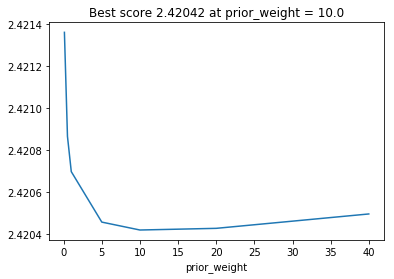

In [38]:
weights = [0.1, 0.5, 1., 5., 10., 20.,40.]
res = [score(ptrain,'brand',prior_weight=w) for w in weights]
plt.plot(weights, res)
plt.title('Best score {:.5f} at prior_weight = {}'.format(np.min(res),weights[np.argmin(res)]))
plt.xlabel('prior_weight')

Text(0.5,0,'prior_weight')

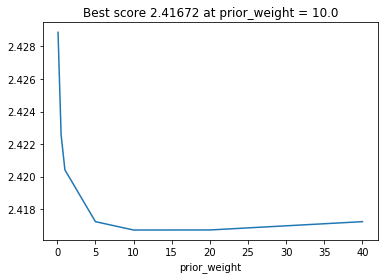

In [39]:
weights = [0.1, 0.5, 1., 5., 10., 20.,40.]
res = [score(ptrain,'model',prior_weight=w) for w in weights]
plt.plot(weights, res)
plt.title('Best score {:.5f} at prior_weight = {}'.format(np.min(res),weights[np.argmin(res)]))
plt.xlabel('prior_weight')

In [40]:
class GenderAgeGroupProb(object):
    def __init__(self, prior_weight=10.):
        self.prior_weight = prior_weight
    
    def fit(self, df, by):
        self.by = by
        #self.label = 'pF_' + by
        self.prior = df['group'].value_counts().sort_index()/df.shape[0]
        # fit gender probs by grouping column
        c = df.groupby([by, 'group']).size().unstack().fillna(0)
        total = c.sum(axis=1)
        self.prob = (c.add(self.prior_weight*self.prior)).div(c.sum(axis=1)+self.prior_weight, axis=0)
        return self
    
    def predict_proba(self, df):
        pred = df[[self.by]].merge(self.prob, how='left', 
                                left_on=self.by, right_index=True).fillna(self.prior)[self.prob.columns]
        pred.loc[pred.iloc[:,0].isnull(),:] = self.prior
        return pred.values
    
def score(ptrain, by, prior_weight=10.):
    kf = KFold(ptrain.shape[0], n_folds=10, shuffle=True, random_state=0)
    pred = np.zeros((ptrain.shape[0],n_classes))
    for itrain, itest in kf:
        train = ptrain.iloc[itrain,:]
        test = ptrain.iloc[itest,:]
        ytrain, ytest = y[itrain], y[itest]
        clf = GenderAgeGroupProb(prior_weight=prior_weight).fit(train,by)
        pred[itest,:] = clf.predict_proba(test)
    return log_loss(y, pred)

Text(0.5,0,'prior_weight')

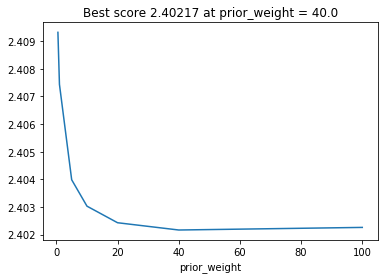

In [41]:
weights = [0.5, 1., 5., 10., 20.,40.,100.]
res = [score(ptrain,'brand',prior_weight=w) for w in weights]
plt.plot(weights, res)
plt.title('Best score {:.5f} at prior_weight = {}'.format(np.min(res),weights[np.argmin(res)]))
plt.xlabel('prior_weight')

Text(0.5,0,'prior_weight')

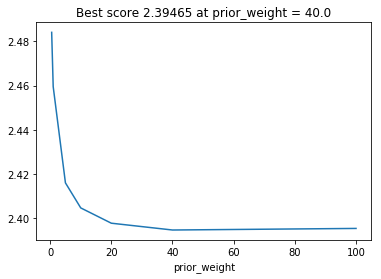

In [42]:
weights = [0.5, 1., 5., 10., 20.,40.,100.]
res = [score(ptrain,'model',prior_weight=w) for w in weights]
plt.plot(weights, res)
plt.title('Best score {:.5f} at prior_weight = {}'.format(np.min(res),weights[np.argmin(res)]))
plt.xlabel('prior_weight')

In [43]:
kf = KFold(ptrain.shape[0], n_folds=10, shuffle=True, random_state=0)
predb = np.zeros((ptrain.shape[0],n_classes))
predm = np.zeros((ptrain.shape[0],n_classes))
for itrain, itest in kf:
    train = ptrain.iloc[itrain,:]
    test = ptrain.iloc[itest,:]
    ytrain, ytest = y[itrain], y[itest]
    clf = GenderAgeGroupProb(prior_weight=40.).fit(train,'brand')
    predb[itest,:] = clf.predict_proba(test)
    clf = GenderAgeGroupProb(prior_weight=40.).fit(train,'model')
    predm[itest,:] = clf.predict_proba(test)
log_loss(y, 0.5*(predb+predm))

2.3909032414810976

In [44]:
ptest = gatest.merge(phone[['device_id','brand','model']], how='left',on='device_id')
ptest.head(3)

device_id  brand  model
0  1002079943728939269     51    857
1 -1547860181818787117     51    860
2  7374582448058474277     31    717

In [45]:
clf = GenderAgeGroupProb(prior_weight=40.).fit(ptrain,'brand')
predb = clf.predict_proba(ptest)
clf = GenderAgeGroupProb(prior_weight=40.).fit(ptrain,'model')
predm = clf.predict_proba(ptest)

In [46]:
pd.DataFrame(0.5*(predb+predm), 
             index = ptest.device_id, 
             columns=letarget.classes_).to_csv('pbm_subm.csv', index=True)